## Matias Padron Michele Yanez - Algoritmo Arbol de decisión

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [3]:
data = pd.read_csv('data_evaluacion_limpia_categorical.csv')
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,edad,clase_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,ganancia_capital,perdida_capital,horas_por_semana,pais,sexo,salario
0,50,6,83311,10,13,3,4,1,5,0,0,13,39,True,False
1,38,4,215646,12,9,1,6,2,5,0,0,40,39,True,False
2,53,4,234721,2,7,3,6,1,3,0,0,40,39,True,False
3,28,4,338409,10,13,3,10,6,3,0,0,40,5,False,False
4,37,4,284582,13,14,3,4,6,5,0,0,40,39,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,4,215419,10,13,1,10,2,5,0,0,36,39,False,False
48837,64,4,321403,12,9,7,3,3,3,0,0,40,39,True,False
48838,38,4,374983,10,13,3,10,1,5,0,0,50,39,True,False
48839,44,4,83891,10,13,1,1,4,2,5455,0,40,39,True,False


In [4]:
x = data.drop(columns=['salario']).values
y = data['salario'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [6]:
print('Numero de muestras en y:', np.bincount(y))
print('Numero de muestras en y_train:', np.bincount(y_train))
print('Numero de muestras en y_test:', np.bincount(y_test))

Numero de muestras en y: [37154 11687]
Numero de muestras en y_train: [26007  8181]
Numero de muestras en y_test: [11147  3506]


In [7]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
arbol.fit(X_train, y_train) # Entrenamos el arbol de decisión
y_pred = arbol.predict(X_test) # Predecimos las etiquetas de las muestras de prueba

In [8]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % arbol.score(X_train, y_train))
print('Test Accuracy : %.5f' % arbol.score(X_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.85208
Test Accuracy : 0.85198
Precisión del modelo: 0.8519757046338634


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.91     11147
        True       0.78      0.54      0.63      3506

    accuracy                           0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.85      0.85      0.84     14653



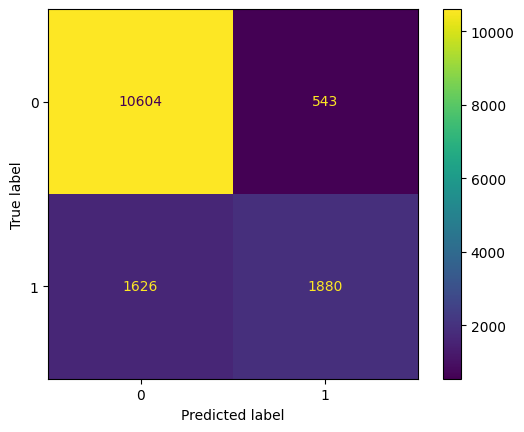

In [10]:
# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[0, 1])
disp.plot()